In [14]:
# Create Latitude and Longitude Combinations
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs # When we run this cell, the output is a zip object in memory. The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.

In [8]:
# Add the latitudes and longitudes to a list. Here we unzip thw zip from above!
coordinates = list(lat_lngs)

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [18]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 #броим позицията на записа! всеки сет започва от 1, затова при нов сет залагама 1 като начало тук;
        
    # Create endpoint URL with each city.
    # city_url = url + "&q=" + cities[i] --> wanting to check if this really gives an error!!! <---
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") #когато градът се състои от 2 думи (има празно място м/у думите), кодът ще върне само първата дума. Затова е нужно replace ...

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass #continue can be used as well!

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 13 of Set 25 | nuevo progreso
Processing Record 14 of Set 25 | grand gaube
Processing Record 15 of Set 25 | guerrero negro
Processing Record 16 of Set 25 | lasa
Processing Record 17 of Set 25 | ushuaia
Processing Record 18 of Set 25 | bansko
Processing Record 19 of Set 25 | haines junction
Processing Record 20 of Set 25 | hermanus
Processing Record 21 of Set 25 | mbour
Processing Record 22 of Set 25 | qasigiannguit
Processing Record 23 of Set 25 | sinnamary
Processing Record 24 of Set 25 | saskylakh
Processing Record 25 of Set 25 | mabaruma
Processing Record 26 of Set 25 | vaini
Processing Record 27 of Set 25 | lebu
Processing Record 28 of Set 25 | college
Processing Record 29 of Set 25 | tulum
Processing Record 30 of Set 25 | albany
Processing Record 31 of Set 25 | dukat
Processing Record 32 of Set 25 | bonavista
Processing Record 33 of Set 25 | lagoa
Processing Record 34 of Set 25 | port alfred
Processing Record 35 of Set 25 | bargal
City not found. Skipping...
Proc

Processing Record 36 of Set 28 | kouango
Processing Record 37 of Set 28 | yanam
Processing Record 38 of Set 28 | tandil
Processing Record 39 of Set 28 | la asuncion
Processing Record 40 of Set 28 | le mars
Processing Record 41 of Set 28 | erenhot
Processing Record 42 of Set 28 | corrales
Processing Record 43 of Set 28 | sisimiut
Processing Record 44 of Set 28 | iqaluit
Processing Record 45 of Set 28 | ostersund
Processing Record 46 of Set 28 | lolua
City not found. Skipping...
Processing Record 47 of Set 28 | bartica
Processing Record 48 of Set 28 | luderitz
Processing Record 49 of Set 28 | vardo
Processing Record 50 of Set 28 | nikolskoye
Processing Record 1 of Set 29 | buala
Processing Record 2 of Set 29 | kruisfontein
Processing Record 3 of Set 29 | champerico
Processing Record 4 of Set 29 | kandrian
Processing Record 5 of Set 29 | mehran
Processing Record 6 of Set 29 | iracoubo
Processing Record 7 of Set 29 | chifeng
Processing Record 8 of Set 29 | kyakhta
Processing Record 9 of Se

Processing Record 23 of Set 32 | severo-yeniseyskiy
Processing Record 24 of Set 32 | akyab
Processing Record 25 of Set 32 | fukue
Processing Record 26 of Set 32 | amapa
Processing Record 27 of Set 32 | sentyabrskiy
City not found. Skipping...
Processing Record 28 of Set 32 | egvekinot
Processing Record 29 of Set 32 | ghanzi
Processing Record 30 of Set 32 | leshukonskoye
Processing Record 31 of Set 32 | yar-sale
Processing Record 32 of Set 32 | stryn
Processing Record 33 of Set 32 | burkhala
City not found. Skipping...
Processing Record 34 of Set 32 | thompson
Processing Record 35 of Set 32 | marcona
City not found. Skipping...
Processing Record 36 of Set 32 | tuatapere
Processing Record 37 of Set 32 | krotoszyn
Processing Record 38 of Set 32 | hukuntsi
Processing Record 39 of Set 32 | coromandel
Processing Record 40 of Set 32 | korla
Processing Record 41 of Set 32 | fairbanks
Processing Record 42 of Set 32 | zhuanghe
Processing Record 43 of Set 32 | smiths falls
Processing Record 44 of

City not found. Skipping...
Processing Record 12 of Set 36 | cermik
Processing Record 13 of Set 36 | cayenne
Processing Record 14 of Set 36 | atar
Processing Record 15 of Set 36 | bentiu
Processing Record 16 of Set 36 | pitimbu
Processing Record 17 of Set 36 | peace river
Processing Record 18 of Set 36 | haibowan
City not found. Skipping...
Processing Record 19 of Set 36 | cobija
Processing Record 20 of Set 36 | black river
Processing Record 21 of Set 36 | setermoen
Processing Record 22 of Set 36 | hasaki
Processing Record 23 of Set 36 | bereda
Processing Record 24 of Set 36 | kaeo
Processing Record 25 of Set 36 | madang
Processing Record 26 of Set 36 | tarakan
Processing Record 27 of Set 36 | kisangani
Processing Record 28 of Set 36 | hirara
Processing Record 29 of Set 36 | saint-pierre
Processing Record 30 of Set 36 | rio tercero
Processing Record 31 of Set 36 | osinovo
Processing Record 32 of Set 36 | horizontina
Processing Record 33 of Set 36 | skjervoy
Processing Record 34 of Set 

In [21]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dbde025c0b5b0982c92fb94927420c1c&q=aykhal'

In [23]:
len(city_data)

572

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nuevo Progreso,23.1667,-97.9500,79.59,83,98,2.06,MX,2021-07-30 06:06:10
1,Grand Gaube,-20.0064,57.6608,74.37,65,64,11.99,MU,2021-07-30 06:06:10
2,Guerrero Negro,27.9769,-114.0611,70.65,82,55,12.88,MX,2021-07-30 06:06:10
3,Lasa,46.6166,10.7002,67.03,79,45,2.28,IT,2021-07-30 06:06:11
4,Ushuaia,-54.8000,-68.3000,37.06,75,20,10.36,AR,2021-07-30 06:06:11
5,Bansko,41.8383,23.4885,83.70,30,0,2.10,BG,2021-07-30 06:06:11
6,Haines Junction,60.7522,-137.5108,53.42,77,20,5.39,CA,2021-07-30 06:06:12
7,Hermanus,-34.4187,19.2345,51.91,78,70,5.10,ZA,2021-07-30 06:06:12
8,Mbour,14.4220,-16.9638,79.65,83,100,4.68,SN,2021-07-30 06:06:13
9,Qasigiannguit,68.8193,-51.1922,46.65,75,80,2.48,GL,2021-07-30 06:06:13


In [26]:
new_column_names = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_names]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuevo Progreso,MX,2021-07-30 06:06:10,23.1667,-97.9500,79.59,83,98,2.06
1,Grand Gaube,MU,2021-07-30 06:06:10,-20.0064,57.6608,74.37,65,64,11.99
2,Guerrero Negro,MX,2021-07-30 06:06:10,27.9769,-114.0611,70.65,82,55,12.88
3,Lasa,IT,2021-07-30 06:06:11,46.6166,10.7002,67.03,79,45,2.28
4,Ushuaia,AR,2021-07-30 06:06:11,-54.8000,-68.3000,37.06,75,20,10.36
...,...,...,...,...,...,...,...,...,...
567,Jumla,NP,2021-07-30 06:09:53,29.2747,82.1838,64.35,95,100,2.84
568,Brae,GB,2021-07-30 06:09:54,60.3964,-1.3530,53.51,93,99,11.25
569,Marquette,US,2021-07-30 06:09:54,46.5333,-87.6335,56.77,79,42,4.36
570,Tulare,US,2021-07-30 06:09:55,36.2666,-118.8009,80.94,35,67,1.99


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [39]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x") #ако х се пропусне, връща непрочитуем формат
today

'07/29/21'

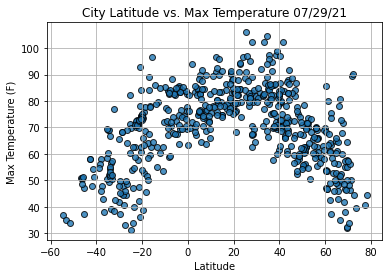

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

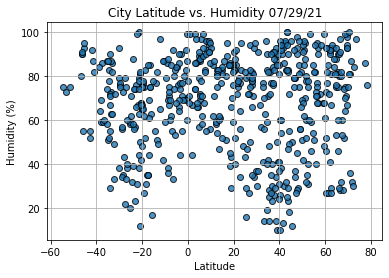

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

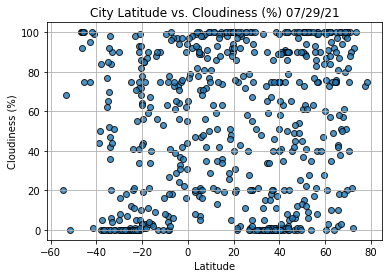

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()